In [1]:
import picell
from picell import react_element as rel
import sys
import networkx as nx
from collections import Counter
import molmass
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cell = picell.Cell()

handler = picell.WholeCellKBHandlerJSON('../data/data.json')
handler.set_ignore_list('ignore_list.txt')
handler.set_name_mapping('name_mapping.txt')

cell.set_translation_process(picell.ProteinTranslation(handler.get_translation_table()))
cell.translation_process.set_imature_protein_prefix('Imature')
cell.translation_process.set_peptide_prefix('Peptide')
cell.translation_process.set_translation_complex_prefix('TranslationComplex')
cell.translation_process.set_ribosome(rel('RIBOSOME_70S','c'))
cell.translation_process.set_translation_complex_constitution([rel('MG_196_MONOMER','c'),
                                                               cell.translation_process.get_ribosome()])
cell.translation_process.set_initiation_auxiliaries([rel('MG_173_MONOMER','c'),
                                                     rel('MG_142_MONOMER','c')])
cell.translation_process.set_elongation_energy_molecules([rel('GTP','c',-1),
                                                          rel('GDP','c'),
                                                          rel('H','c'),
                                                          rel('PI','c'),
                                                          rel('H2O','c',-1)]) 
cell.translation_process.set_elongation_auxiliaries([rel('MG_089_DIMER','c'),
                                                     rel('MG_451_DIMER','c'),
                                                     rel('MG_433_DIMER','c'),
                                                     rel('MG_026_MONOMER','c'),
                                                     rel('MG_258_MONOMER','c'),
                                                     rel('MG_435_MONOMER','c')]) 
cell.translation_process.set_translocation_proteins([rel('MG_055_170_277_464_476_20MER','m')]) 
cell.translation_process.set_translocation_enzymes([rel('MG_297_MONOMER','c'),
                                                    rel('MG_210_MONOMER','m'),
                                                    rel('MG_0001_048','c')])
cell.translation_process.set_gtp_cost_for_translocation(2)
cell.translation_process.set_stalled_translation_complex_sufix('Stalled')
cell.translation_process.set_translation_stall_auxiliaries([rel('MG_059_MONOMER','c')])
cell.translation_process.set_translation_stall_tmRNA([rel('MG_0004_ALA','c')])
cell.translation_process.set_tmRNA_proteolysis_tag_chromosome_feature("tmRNA_proteolysis_tag")

cell.set_transcription_process(picell.RNATranscription())
cell.transcription_process.set_imature_rna_prefix('Imature')
cell.transcription_process.set_oligonucleotide_prefix('Small_RNA')
cell.transcription_process.set_tu_transcript_sufix('Transcript')
cell.transcription_process.set_ribonucleic_acids({'A':['AMP','ADP','ATP'],'G':['GMP','GDP','GTP'],'C':['CMP','CDP','CTP'],'U':['UMP','UDP','UTP']})
cell.transcription_process.set_rna_cleavage_enzymes({'rRNA':[rel('MG_367_DIMER','c'),rel('MG_139_DIMER','c'),rel('MG_110_MONOMER','c'),rel('MG_425_DIMER','c')],
                                                     'tRNA':[rel('MG_367_DIMER','c'),rel('MG_0003_465','c')]
                                                    })
cell.transcription_process.set_cost_per_cleavage({'rRNA':3.37,'tRNA':0})
cell.transcription_process.set_cleavage_energy_molecules([rel('GTP','c',-1),
                                                          rel('GDP','c'),
                                                          rel('H','c'),
                                                          rel('PI','c'),
                                                          rel('H2O','c',-1)]) 
cell.transcription_process.set_active_transcription_complex_sufix("Transcribing_Complex")
cell.transcription_process.set_transcription_complex_sufix("Transcription_Complex")
cell.transcription_process.set_dna_sufix("DNA")
cell.transcription_process.set_rna_polymerase(rel('RNA_POLYMERASE','c'))
cell.transcription_process.set_rna_polymerase_holoenzyme(rel('RNA_POLYMERASE_HOLOENZYME','c'))
cell.transcription_process.set_sigma_factor(rel('MG_249_MONOMER','c'))
cell.transcription_process.set_transcription_release_factors([rel('MG_027_MONOMER','c'),rel('MG_141_MONOMER','c')]) 
cell.transcription_process.set_transcription_elongation_factors([rel('MG_282_MONOMER','c')]) 
cell.transcription_process.set_ppi(rel('PPI','c'))

cell.set_replication_process(picell.DNAReplication())
cell.replication_process.set_active_replication_complex_sufix("Replicating_Complex")
cell.replication_process.set_replication_complex_sufix("Replication_Complex")
cell.replication_process.set_replication_start_feature({'Mgenitalium_Chr_1':'oriC'})
cell.replication_process.set_replication_terminus_feature({'Mgenitalium_Chr_1':'terC'})
cell.replication_process.set_deoxiribonucleic_acids({'A':['DAMP','DADP','DATP'],'G':['DGMP','DGDP','DGTP'],'C':['DCMP','DCDP','DCTP'],'T':['DTMP','DTDP','DTTP']})
cell.replication_process.set_ppi(rel('PPI','c',1))
cell.replication_process.set_replication_complex_composition([rel('DNA_POLYMERASE_CORE','c',2),
                                                              rel('DNA_POLYMERASE_GAMMA_COMPLEX','c'),
                                                              rel('MG_001_MONOMER','c',4),
                                                              rel('MG_094_HEXAMER','c'),
                                                              rel('MG_250_MONOMER','c'),
                                                              rel('DNA_GYRASE','c'),
                                                              rel('MG_203_204_TETRAMER','c'),
                                                              rel('MG_122_MONOMER','c')])
cell.replication_process.set_energy_molecules([rel('ATP','c',-1),
                                              rel('ADP','c'),
                                              rel('H','c'),
                                              rel('PI','c'),
                                              rel('H2O','c',-1)]) 
cell.replication_process.set_active_dnaA(rel('MG_469_1MER_ATP','c'))
cell.replication_process.set_inactive_dnaA(rel('MG_469_1MER_ADP','c'))
cell.replication_process.set_sorted_dnaA_complexes([rel('MG_469_1MER_ATP','c'),
                                            rel('MG_469_2MER_ATP','c'),
                                            rel('MG_469_3MER_ATP','c'),
                                            rel('MG_469_4MER_ATP','c'),
                                            rel('MG_469_5MER_ATP','c'),
                                            rel('MG_469_6MER_ATP','c'),
                                            rel('MG_469_7MER_ATP','c')])
cell.replication_process.set_sorted_inactive_dnaA_complexes([rel('MG_469_2MER_1ATP_ADP','c'),
                                            rel('MG_469_3MER_2ATP_ADP','c'),
                                            rel('MG_469_4MER_3ATP_ADP','c'),
                                            rel('MG_469_5MER_4ATP_ADP','c'),
                                            rel('MG_469_6MER_5ATP_ADP','c'),
                                            rel('MG_469_7MER_6ATP_ADP','c')])
cell.replication_process.set_dnaA_replication_boxes(['DnaA_Box_2277','DnaA_Box_2276','DnaA_Box_2275','DnaA_Box_0149','DnaA_Box_2278'])
cell.replication_process.set_dna_repair_enzymes([rel('MG_254_MONOMER','c'),
                                                 rel('MG_105_OCTAMER','c'),
                                                 rel('MG_498_MONOMER','c'),
                                                 rel('MG_097_MONOMER','c'),
                                                 rel('MG_235_MONOMER','c'),
                                                 rel('MG_073_206_421_TETRAMER','c'),
                                                 rel('MG_339_MONOMER','c'),
                                                 rel('MG_262_MONOMER','c'),
                                                 rel('MG_358_359_10MER','c')
                                                ])
cell.replication_process.set_dna_condensation_protein(rel('MG_213_214_298_6MER_ADP','c'))
cell.replication_process.set_dna_condensation_unbounded_protein([rel('MG_213_214_298_6MER','c'),
                                                                rel('ADP','c')])

cell.set_protein_degradation_process(picell.ProteinDegradation())
cell.protein_degradation_process.set_intracellullar_degradation_enzymes([rel('MG_239_HEXAMER','c')])
cell.protein_degradation_process.set_membrane_degradation_enzymes([rel('MG_457_HEXAMER','m')])
cell.protein_degradation_process.set_signaled_degradation_enzymes([rel('MG_457_HEXAMER','m')])
cell.protein_degradation_process.set_peptidases([ rel('MG_324_MONOMER','c'),
                                                 rel('MG_391_HEXAMER','c'),
                                                 rel('MG_208_DIMER','c'),
                                                 rel('MG_046_DIMER','c'),
                                                 rel('MG_183_MONOMER','c'),
                                                 rel('MG_020_MONOMER','c')])
cell.protein_degradation_process.set_mean_cleavage_cost({'MG_239_HEXAMER':1,'MG_457_HEXAMER':1})
cell.protein_degradation_process.set_mean_cleavage_length({'MG_239_HEXAMER':15,'MG_457_HEXAMER':15})
cell.protein_degradation_process.set_energy_molecules([rel('ATP','c',-1),
                                              rel('ADP','c'),
                                              rel('H','c'),
                                              rel('PI','c'),
                                              rel('H2O','c',-1)])

cell.set_rna_degradation_process(picell.RNADegradation())
cell.rna_degradation_process.set_degradation_enzymes([rel('MG_104_MONOMER','c')])
cell.rna_degradation_process.set_aminoacylated_trna_degradation_enzymes([rel('MG_083_MONOMER','c')])

True

In [3]:
cell.add_chromosomes(handler.create_all_chromosomes())
cell.add_chromosome_features(handler.get_chromosome_features())
cell.add_genes(handler.create_all_genes())
cell.add_transcription_units(handler.create_all_transcription_units())
cell.set_chromosome_region_length({'Mgenitalium_Chr_1':500000})
cell.create_chromosome_regions()

cell.translation_process.add_modification_reactions(handler.create_all_protein_modification_reactions(cell.translation_process))
cell.transcription_process.add_modification_reactions(handler.create_all_rna_modification_reactions(cell.transcription_process))

cell.add_reactions(handler.create_all_metabolic_reactions())
cell.add_reactions(handler.create_all_aminoacylation_reactions(cell.translation_process))

cell.solve_inconcistencies(handler)

cell.add_all_DnaA_complexes("DnaA_Box")
cell.add_reactions(handler.get_chemical_reactions(['DnaA_inactivation','DnaA_reactivation']))

cell.add_all_dna_condensed_states(500)

cell.solve_inconcistencies(handler)

cell.add_reactions(handler.create_all_terminal_organelle_assembly_reactions())

met = picell.SmallMolecule()
met.ref_name = 'phosphopantetheine'
met.name = "4'-phosphopantetheine"
met.cross_references = {'ECMDB':'ECMDB24213',
                        'ECMDB':'M2MDB006330'}
met.annotations = ['Metabolite']
met.original_database = "ECMDB"
met.formula = "C11H23N2O7PS"
met.compute_mw_from_formula()
met.smiles = "CC(C(=O)NCCC(=O)NCCS)C(C)(C)COP([O-])([O-])=O"
met.iupac_name = "2,3,3-trimethyl-4-(phosphonatooxy)-N-{2-[(2-sulfanylethyl)carbamoyl]ethyl}butanamide"
met.is_hydrophobic = False
met.charge = -2
met.log_p = 0.9
cell.add_molecule(met)

cell_div = picell.CellDivisionReaction()
cell_div.process = "Cellular Division"
for dna in cell.get_replication_terminus_dnas():
    cell_div.auxiliar_molecules.append(rel(dna,'c',2))
cell_div.auxiliar_molecules.append(rel('MG_470_MONOMER','c'))
cell_div.auxiliar_molecules.append(rel('MG_384_MONOMER','c'))
cell_div.auxiliar_molecules.append(rel('MG_221_OCTAMER','c'))
cell_div.auxiliar_molecules.append(rel('MG_387_MONOMER','c'))
cell_div.auxiliar_molecules.append(rel('MG_203_204_TETRAMER','c'))
cell_div.auxiliar_molecules.append(rel('MG_224_9MER_GDP','c',9))
cell_div.auxiliar_molecules.append(rel('MG_191_MONOMER','tm',2))
cell_div.auxiliar_molecules.append(rel('MG_192_MONOMER','tm',2))
cell_div.auxiliar_molecules.append(rel('MG_386_MONOMER','tc',2))
cell_div.auxiliar_molecules.append(rel('MG_318_MONOMER','tm',2))
cell_div.auxiliar_molecules.append(rel('MG_217_MONOMER','tc',2))
cell_div.auxiliar_molecules.append(rel('MG_317_MONOMER','tc',2))
cell_div.auxiliar_molecules.append(rel('MG_218_MONOMER','tc',2))
cell_div.auxiliar_molecules.append(rel('MG_312_MONOMER','tc',2))
cell_div.molecules.append(rel('GTP','c',-4))
cell_div.molecules.append(rel('GDP','c',4))
cell_div.molecules.append(rel('H2O','c',-4))
cell_div.molecules.append(rel('PI','c',4))
cell_div.molecules.append(rel('H','c',4))
cell.add_reaction(cell_div)

react = picell.ChemicalReaction()
react.ref_name = "H2O_formation"
react.name = "H2O formation"
react.annotations = ['Chemical Reaction']
react.process = "Metabolism"
react.molecules.append(rel('H2O','c'))
react.molecules.append(rel('H','c',-1))
react.molecules.append(rel('OH','c',-1))
react.is_reversible = True
cell.add_reaction(react)

cell.solve_inconcistencies(handler)

cell.reactions['MG_213_214_298_6MER_ADP_BIOSYNTHESIS'].molecules = [rel('MG_213_214_298_6MER','c',-1),
                                                                    rel('MG_213_214_298_6MER_ADP','c'),
                                                                    rel('ATP','c',-1),
                                                                    rel('H2O','c',-1),
                                                                    rel('H','c'),
                                                                    rel('PI','c')]
cell.reactions['MG_213_214_298_6MER_ADP_BIOSYNTHESIS'].is_reversible = True


monomers = list(set([entry['wid'] for entry in handler.wcdata['data'] if entry['model']=='ProteinMonomer' and entry['wid'] not in handler.ignore_list]))
complexes = list(set([entry['wid'] for entry in handler.wcdata['data'] if entry['model']=='ProteinComplex' and entry['wid'] not in handler.ignore_list]))
additional_molecules = []
for m in monomers+complexes:
    if m not in cell.molecules.keys():
        additional_molecules.append(m)
cell.add_molecules([handler.make_molecule_from_entry_name(mol) for mol in additional_molecules])

cell.solve_inconcistencies(handler)
cell.solve_inconcistencies(handler)
cell.solve_inconcistencies(handler)
cell.solve_inconcistencies(handler)
cell.solve_inconcistencies(handler)


cell.remove_molecules_from_composition('MG_229_231_TETRAMER_ox',4*['H'])
cell.remove_molecules_from_composition('MG_427_DIMER_ox',4*['H'])
cell.remove_molecules_from_composition('MG_454_DIMER_ox',4*['H'])
cell.remove_molecules_from_composition('MG_102_DIMER_ox',4*['H'])
cell.remove_molecules_from_composition('MG_124_MONOMER_ox',2*['H'])
cell.remove_molecules_from_composition('MG_127_MONOMER_ox',2*['H'])
cell.remove_molecules_from_composition('MG_295_MONOMER_ox',2*['H'])
cell.remove_molecules_from_composition('MG_271_272_273_274_4MER_ox',2*['H'])

cell.solve_inconcistencies(handler)
print(cell.solve_inconcistencies(handler))

cell.compute_all_reaction_mass_balance()
weight_diff = {key:val.mass_balance for key,val in cell.reactions.items()}
vals = np.array(list(weight_diff.values()))
print(np.max(vals),np.min(vals),np.mean(vals),np.std(vals))

({}, {})
9.597840744390851e-08 -0.0010000000000012221 -3.797288102612238e-08 6.1577879262085854e-06


In [4]:
cell.save("mg_picell_data2.json",compressed=False)

True

In [5]:
g = cell.generate_network()

nx.set_node_attributes(g, dict(g.degree()), 'degree')
nx.set_node_attributes(g, dict(g.in_degree()), 'indegree')
nx.set_node_attributes(g, dict(g.out_degree()), 'outdegree')
nx.set_node_attributes(g, dict(g.degree(weight='sto')), 'stodegree')
nx.set_node_attributes(g, dict(g.in_degree(weight='sto')), 'instodegree')
nx.set_node_attributes(g, dict(g.out_degree(weight='sto')), 'outstodegree')

In [6]:
nx.write_gml(g,'networks/mg_net.gml')
nx.write_graphml(g,'networks/mg_net.graphml')

In [7]:
print("total nodes:",len(g.nodes))
print("total edges:",len(g.edges))
print("molecules:",len([x for x,y in g.nodes(data=True) if y['type']=='m']))
print("reactions:",len([x for x,y in g.nodes(data=True) if y['type']=='r']))

total nodes: 119689
total edges: 480094
molecules: 37027
reactions: 82662


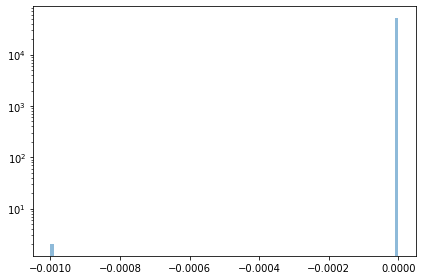

In [8]:
num_bins = 100

fig, ax = plt.subplots()
#plt.xscale('log')
plt.yscale('log')
# the histogram of the data
n, bins, patches = ax.hist(np.array(list(weight_diff.values())), num_bins,alpha=0.5)
#n, bins, patches = ax.hist(dna_region_weights_diff, num_bins, density=1,alpha=0.5)

fig.tight_layout()
plt.show()

In [9]:
with open("mg_info_reg.gff","w") as f:
    f.write("seqname\tsource\tfeature\tstart\tend\tscore\tstrand\tframe\n")
    for chrm in cell.chromosome_regions.values():
        f.write("\t".join([chrm.ref_name,"WholeCellKB","A",str(chrm.start),str(chrm.end),".","+","."]))
        f.write("\n")
with open("mg_info_gen.gff","w") as f:
    f.write("seqname\tsource\tfeature\tstart\tend\tscore\tstrand\tframe\n")
    for gene in cell.genes.values():
        direction = "+"
        if gene.direction =="Reverse":
            direction = "-"
        gen_type = "CDS"
        if gene.type in ["tRNA","rRNA"]:
            gen_type = gene.type
        f.write("\t".join([gene.ref_name,"WholeCellKB",gen_type,str(gene.start),str(gene.start+gene.length-1),".",direction,"."]))
        f.write("\n")
with open("mg_info_tu.gff","w") as f:
    f.write("seqname\tsource\tfeature\tstart\tend\tscore\tstrand\tframe\n")
    for tu in cell.transcription_units.values():
        direction = "+"
        if tu.direction =="Reverse":
            direction = "-"
        f.write("\t".join([tu.ref_name,"WholeCellKB","T",str(tu.transcription_start),str(tu.transcription_end),".",direction,"."]))
        f.write("\n")
with open("mg_info_dnaa.gff","w") as f:
    f.write("seqname\tsource\tfeature\tstart\tend\tscore\tstrand\tframe\n")
    for chrm in cell.chromosome_regions.values():
        for ft in chrm.features:
            if "DnaA_Box" in ft:
                f.write("\t".join([ft,"WholeCellKB","K",str(chrm.start),str(chrm.end),".","+","."]))
                f.write("\n")

In [10]:
print(cell.get_replication_terminus_dnas())

['Mgenitalium_Chr_1_region_2206_DNA']


In [11]:
chrm = 'Mgenitalium_Chr_1'
dnaA_boxes = Counter([cell.chromosomes[chrm].features[box]['start'] for box in cell.replication_process.dnaA_replication_boxes])
for box,sto in dnaA_boxes.items():
    reg = cell.get_chromosome_region_from_coordinate(chrm,box)
    print(reg+"_"+cell.transcription_process.dna_sufix +"_"+cell.replication_process.dnaA_complex[-1]['molecule'])

Mgenitalium_Chr_1_region_4530_DNA_MG_469_7MER_ATP
Mgenitalium_Chr_1_region_4526_DNA_MG_469_7MER_ATP
Mgenitalium_Chr_1_region_4524_DNA_MG_469_7MER_ATP
Mgenitalium_Chr_1_region_4516_DNA_MG_469_7MER_ATP
Mgenitalium_Chr_1_region_4514_DNA_MG_469_7MER_ATP


In [12]:
print(cell.translation_process.aminoacids_names)

['ASN', 'ALA', 'THR', 'TRP', 'LEU', 'LYS', 'TYR', 'ASP', 'SER', 'CYS', 'HIS', 'MET', 'PHE', 'FMET', 'ILE', 'ARG', 'VAL', 'GLN', 'PRO', 'GLY', 'GLU']
